# Discussion Assignment 1:
Perform exploratory analysis of Titanic test file from kaggle.

# Ingest

In [0]:
# Mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Read in titanic test file
test_df = pd.read_csv('/content/gdrive/My Drive/northwestern/422-msds/422-colab/data-files/train.csv')

# Exploratory Data Analysis

### Descriptive Statistics

In [5]:
# Review columns
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Survival Count Crosstab by Passenger Class
pd.crosstab(test_df.Pclass, test_df.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [0]:
def survived_ratio(x):
  '''This function is used within pivot_table to calculate ratio'''
  return np.sum(x) / np.size(x)

In [106]:
# Survival Ratio by Sex
pd.pivot_table(test_df, values='Survived', index='Sex', 
               aggfunc={'Survived': [np.sum, np.size, survived_ratio]})

,size,sum,survived_ratio
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


### Visualizations

#### Age vs Fare Scatterplot

Text(0, 0.5, 'Fare')

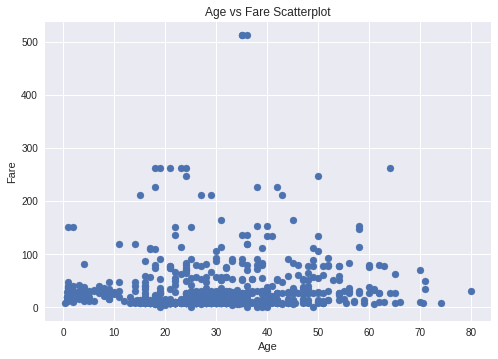

In [85]:
# Age vs Fare Scatterplot
plt.scatter(test_df['Age'], test_df['Fare'])
plt.title('Age vs Fare Scatterplot')
plt.xlabel('Age')
plt.ylabel('Fare')

#### Histograms of Age Distribution by Sex

In [0]:
# Create arrays for historgrams
male_x = test_df[test_df['Sex']=='male'].Age.values
female_x = test_df[test_df['Sex']=='female'].Age.values

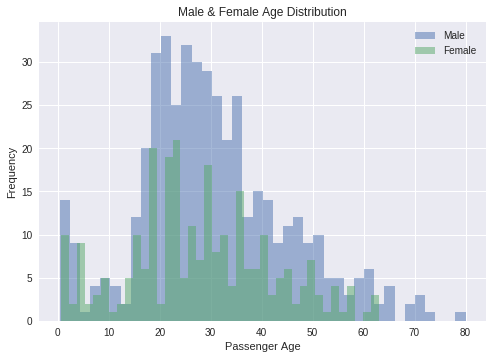

In [84]:
# plt.hist was producing warnings, this suppresses that
import warnings
warnings.filterwarnings('ignore')

# kwargs for histograms
kwargs = dict(histtype='stepfilled', alpha=0.5, bins=40)

# Age histograms by sex
plt.hist(male_x, **kwargs)
plt.hist(female_x, **kwargs)
plt.title('Male & Female Age Distribution')
plt.xlabel('Passenger Age')
plt.ylabel('Frequency')
plt.legend(['Male', 'Female'])

#### Survival Rate by Age

In [0]:
# Create pivot; age by survival rate
age_piv = pd.pivot_table(test_df, values='Survived', index='Age', 
                         aggfunc={'Survived': [np.sum, np.size, survived_ratio]})

In [0]:
# Reset index so all columns are usable in plotting
age_piv = age_piv.reset_index()

Text(0, 0.5, 'Survival Rate')

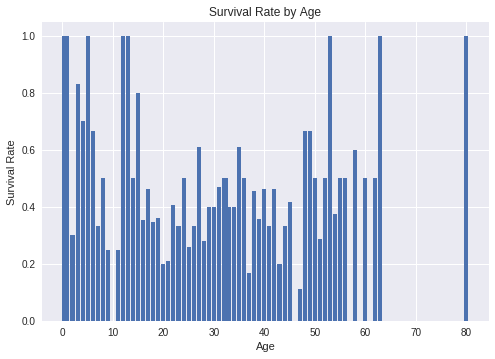

In [122]:
# Bar plot of survival rates
plt.bar(age_piv['Age'], age_piv['survived_ratio'])
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')